## Topic Modeling with Gensim

In [ ]:
Another library different from sklearn


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import regex as re

In [2]:
import spacy 
import en_core_web_sm
en = en_core_web_sm.load()

# Import stopword from spaCy
#import spacy 

# Import stopword from spaCy
#import spacy 
#loading the english language small model of spacy

stopwords_spa = en.Defaults.stop_words

print(len(stopwords_spa))
include_stopwords={'_NUMBER_'}
stopwords_spa|= include_stopwords
print(len(stopwords_spa))
print(stopwords_spa)
print(type(stopwords_spa))

326
327
{"'ve", 'five', 'all', 'used', 'using', 'many', 'others', 'herself', 'hence', 'becoming', 'nine', 'anything', 'which', 'sometimes', 'seem', 'very', 'n’t', 'around', 'been', 'cannot', 'here', 'however', 'whereupon', 'whole', 'whom', 'not', 'latter', 'someone', 'whither', 'our', 'on', 'hereafter', 'whether', 'eight', 'up', 'call', 'so', 'out', 'latterly', '‘s', 'only', 'for', 'must', 'sometime', 'should', 'throughout', "'d", 'will', 'most', 'without', 'by', 'except', 'hereupon', 'front', 'what', 'would', 'the', 'until', 'anyway', 'alone', 'any', 'both', 'meanwhile', 'yourself', 'ca', 'anyhow', 'none', 'either', 'nobody', 'there', 'made', 'whoever', '‘ve', 'within', 'via', 'everywhere', 'to', 'regarding', 'done', 'empty', 'mine', 'besides', 'four', 'top', 'since', 'almost', 'because', 'beyond', 'perhaps', 'move', 'ten', 'two', 'nevertheless', '_NUMBER_', 'six', 'further', 'if', 'do', 'hundred', 'and', 'next', 'us', 'really', 'how', 'was', 'due', 'with', 'behind', 'fifty', 'your', 

In [3]:
file="un-general-debates.csv"
df=pd.read_csv(file)

### Step 1
We tokenize the texts (split) and exclude stopwords

In [4]:
gensim_text=[[w for w in re.findall(r'\b\w\w+\b',text.lower()) if w not in stopwords_spa ] for text in df['text']]

### Step 2
We construct a dictionary who defines the vocabulary of all words after tokenization. Each word receives a unique integer ID

In [5]:
from gensim.corpora import Dictionary
dict_gensim_text=Dictionary(gensim_text) # define the vocabulary of all words that the process know
dict_gensim_text.filter_extremes(no_below=5,no_above=0.7)

In [6]:
print(dict_gensim_text)

Dictionary<24611 unique tokens: ['15', '1980s', '1987', '22', 'ability']...>


### Step 3
We represent each document as a vector of features. We create a bag-of-word representation of a document with doc2bow. doc2bow returns a sparse representation of the word counts.
For each token in a document and in the dictionary we obtain a vector (ID of the token, Number of occurences in the text)

In [7]:
bow_gensim_text = [dict_gensim_text.doc2bow(text) for text in gensim_text]

### Step 4
Computation of tf-idf for the corpus of documents

In [8]:
from gensim.models import TfidfModel
tfidf_gensim_text = TfidfModel(bow_gensim_text) # We initialize the tf_idf model
vector_gensim_text = tfidf_gensim_text[bow_gensim_text] # We apply it to the 

## NMF with Gensim

In [24]:
from gensim.models.nmf import Nmf
nmf_gensim_text = Nmf(vector_gensim_text,num_topics=10,id2word=dict_gensim_text,kappa=0.1,eval_every=5)

In [32]:
nmf_gensim_text.show_topics()

[(0,
  '0.001*"co" + 0.001*"operation" + 0.001*"nuclear" + 0.001*"african" + 0.001*"africa" + 0.001*"arab" + 0.001*"south" + 0.001*"sustainable" + 0.001*"terrorism" + 0.001*"independence"'),
 (1,
  '0.001*"co" + 0.001*"operation" + 0.001*"nuclear" + 0.001*"terrorism" + 0.001*"european" + 0.001*"peru" + 0.001*"disarmament" + 0.001*"europe" + 0.001*"korea" + 0.001*"south"'),
 (2,
  '0.001*"nuclear" + 0.001*"arab" + 0.001*"co" + 0.001*"africa" + 0.001*"african" + 0.001*"iraq" + 0.001*"israel" + 0.001*"terrorism" + 0.001*"south" + 0.001*"japan"'),
 (3,
  '0.001*"co" + 0.001*"nuclear" + 0.001*"operation" + 0.001*"guinea" + 0.001*"soviet" + 0.001*"arab" + 0.001*"africa" + 0.001*"african" + 0.001*"israel" + 0.001*"south"'),
 (4,
  '0.001*"african" + 0.001*"africa" + 0.001*"co" + 0.001*"arab" + 0.001*"nuclear" + 0.001*"south" + 0.001*"operation" + 0.001*"namibia" + 0.001*"guinea" + 0.001*"food"'),
 (5,
  '0.001*"co" + 0.001*"african" + 0.001*"africa" + 0.001*"nuclear" + 0.001*"operation" + 0.0

### LDA with Gensim

In [43]:
from gensim.models import LdaModel
lda_gensim_text = LdaModel(corpus=bow_gensim_text,id2word = dict_gensim_text,chunksize=2000, alpha='auto',eta='auto',iterations=400,num_topics=10,passes=20,eval_every=None, random_state=42)

In [44]:
lda_gensim_text.show_topics()

[(0,
  '0.013*"arab" + 0.013*"israel" + 0.009*"palestinian" + 0.008*"iraq" + 0.007*"resolutions" + 0.006*"israeli" + 0.006*"lebanon" + 0.006*"middle" + 0.004*"palestine" + 0.004*"resolution"'),
 (1,
  '0.004*"let" + 0.004*"freedom" + 0.004*"history" + 0.003*"life" + 0.003*"power" + 0.003*"democracy" + 0.003*"come" + 0.003*"want" + 0.003*"know" + 0.003*"justice"'),
 (2,
  '0.009*"africa" + 0.009*"independence" + 0.008*"struggle" + 0.007*"south" + 0.007*"republic" + 0.005*"african" + 0.005*"regime" + 0.005*"aggression" + 0.004*"powers" + 0.004*"liberation"'),
 (3,
  '0.015*"africa" + 0.014*"african" + 0.007*"republic" + 0.004*"democratic" + 0.004*"continent" + 0.004*"delegation" + 0.004*"conflicts" + 0.003*"debt" + 0.003*"dialogue" + 0.003*"parties"'),
 (4,
  '0.013*"terrorism" + 0.007*"afghanistan" + 0.005*"challenges" + 0.005*"terrorist" + 0.005*"goals" + 0.005*"2015" + 0.004*"sustainable" + 0.004*"including" + 0.003*"women" + 0.003*"humanitarian"'),
 (5,
  '0.010*"south" + 0.007*"afri

## Evaluation the coherence of a model

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

In [46]:
nmf_gensim_text_coherence =CoherenceModel(model=nmf_gensim_text,texts=gensim_text,dictionary=dict_gensim_text,coherence='c_v')

nmf_gensim_text_coherence_score = nmf_gensim_text_coherence.get_coherence()

print(nmf_gensim_text_coherence_score)

0.2835422934279378


In [45]:
lda_gensim_text_coherence =CoherenceModel(model=lda_gensim_text,texts=gensim_text,dictionary=dict_gensim_text,coherence='c_v')

lda_gensim_text_coherence_score = lda_gensim_text_coherence.get_coherence()

print(lda_gensim_text_coherence_score)

0.44897818248128407


#### Coherence scores by topic

In [48]:
top_topics = lda_gensim_text.top_topics(vector_gensim_text,topn=10)
avg_topic_coherence = sum([t[1] for t in top_topics])/len(top_topics)
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -0.6086.


In [51]:
[(t[1]," ".join([w[1] for w in t[0]])) for t in top_topics]

[(-0.4115979389217101,
  'south africa co operation nuclear problem disarmament delegation negotiations developed'),
 (-0.41383094076127036,
  'america latin american co relations central law operation possible solution'),
 (-0.47055575080058387,
  'cooperation reform regional nuclear european challenges weapons issues effective stability'),
 (-0.4974324650003483,
  'arab israel palestinian iraq resolutions israeli lebanon middle palestine resolution'),
 (-0.5632931158604277,
  'africa african republic democratic continent delegation conflicts debt dialogue parties'),
 (-0.5686596017264525,
  'nuclear republic soviet relations europe weapons disarmament co union operation'),
 (-0.657694955171228,
  'africa independence struggle south republic african regime aggression powers liberation'),
 (-0.6685828901749649,
  'let freedom history life power democracy come want know justice'),
 (-0.8464734293353025,
  'terrorism afghanistan challenges terrorist goals 2015 sustainable including women

### Finding the optimal number of topics

In [11]:
from tqdm import tqdm # in loop, takes member and iterate over them

In [12]:
from gensim.models.coherencemodel import CoherenceModel

In [14]:
from gensim.models.ldamulticore import LdaMulticore
lda_model_n=[]
for n in tqdm(range(5,20)):
    lda_model = LdaMulticore(corpus=bow_gensim_text,id2word=dict_gensim_text,chunksize=2000,eta='auto',iterations=400,
                             num_topics=n,passes=20,eval_every=None,random_state=42)
    lda_coherence = CoherenceModel(model=lda_model, texts=gensim_text,dictionary=dict_gensim_text,coherence='c_v')
    lda_model_n.append((n,lda_model,lda_coherence.get_coherence()))

100%|███████████████████████████████████████████████████████████████████████████████| 15/15 [1:48:14<00:00, 432.98s/it]


<Axes: xlabel='n'>

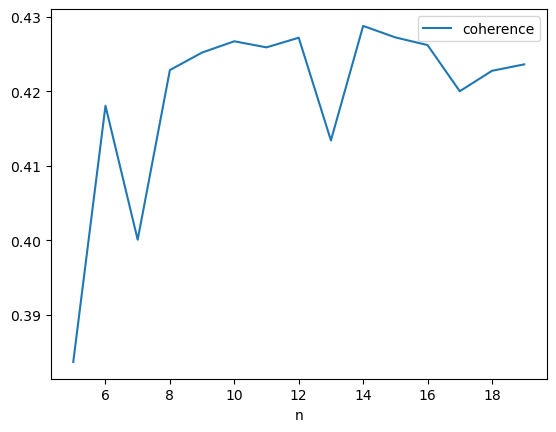

In [16]:
pd.DataFrame(lda_model_n, columns=["n","model","coherence"]).set_index("n")[["coherence"]].plot()